In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as pltpatches
sample_counter = 0

# Centrale limietstelling
## Functies
- createPopulation: Maakt een hele populatie
- createSample: Maakt een sample aan op basis van de populatie
- simulationSamples: Maakt n keer een sample aan en geeft alle samplegemiddeldes terug

In [3]:
def createPopulation (amount,min = 0, max= 200, mu = 0, std = 1, type = 'uniform'):
    pop = np.empty(amount,dtype=np.float64)
    if (type == 'uniform'): # uniform distribution
        pop = np.random.randint(min,max,amount)
    else: # normal distribution
        pop = np.random.normal(mu,std,amount)
    return pop

def createSample(pop,size):
    return np.random.choice(pop,size)

def simulationSamples (pop, amount_of_samples, sample_size):
    sim = np.empty(amount_of_samples,dtype=np.float64)
    for i in range (0,amount_of_samples):
        sim[i]=createSample(pop,sample_size).mean()
    return sim

## Maak een populatie aan
Dit kan een uniform of normaal verdeelde populatie zijn

Population: 
Mu: 40.30611648404467
Sigma: 20.055850684979575


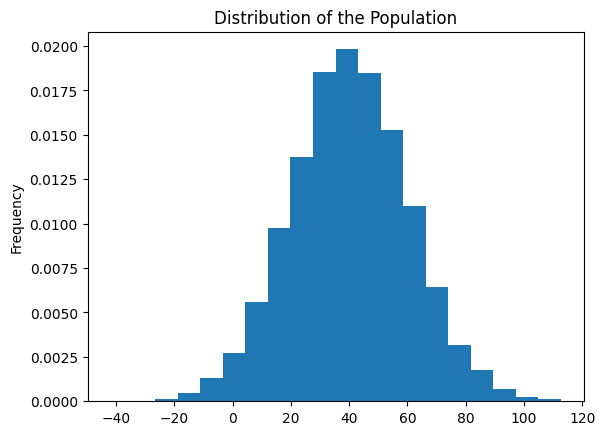

In [4]:

#Experiment with the populations
#If desired, you can adjust the parameters, use 'min max' combined with type 'uniform' or mu std combined with type 'normal'
population = createPopulation(15000, mu=40, std=20,type='normal')

#DO NOT CHANGE-----------------------------------------------------
print(f"Population: ")
print(f'Mu: {population.mean()}')
print(f'Sigma: {population.std()}')
hist=pd.Series(population).plot.hist(title='Distribution of the Population', density = True, bins=20)
fig = hist.get_figure()
sample_counter=0
#DO NOT CHANGE-----------------------------------------------------

## Sample maken
Test hier uit wat er gebeurt bij het maken van samples. Het gemiddelde van de sample wordt getoond op de plot van de populatie. Voer meerdere keren uit om te kijken waar de gemiddeldes van de samples zich relatief van elkaar bevinden.
Welke testen kan je uitvoeren:
- Wat is de invloed van de standaardafwijking van de populatie op de spreiding van de sample-means (bij gelijke sample-grootte)
- Wat is de invloed van de samplegrootte op de spreiding van de sample-means (bij gelijke standaardafwijking). Je kan dit doen door de samplesize hieronder aan te passen en een andere kleur te kiezen bij de Rectangle

In [5]:
# Reset counter
sample_counter = 0

Sample: 2
Mean: 18.27151388354537
Standard deviation: 0.0


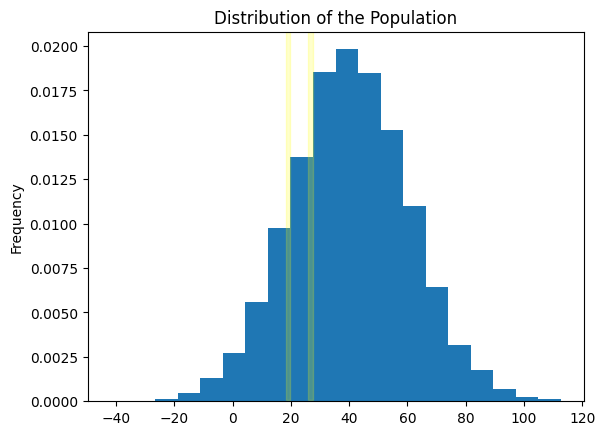

In [8]:
#Adjust sample size if desired. Run multiple times to visualise every sample in relation to the population.

sample = createSample(population,1)
sample_color = 'yellow'
# DO NOT CHANGE----------------------------
sample_counter= sample_counter+1
print(f'Sample: {sample_counter}')
print(f'Mean: {sample.mean()}')
print(f'Standard deviation: {sample.std()}')
width= (population.max()- population.min())/100
# DO NOT CHANGE----------------------------

hist.add_artist(pltpatches.Rectangle((sample.mean(),0.0001), width= width, height= 0.04, color=sample_color, alpha=0.2)) #CHANGE COLOR
fig #DO NOT REMOVE

Simulations:
Mean: 40.231523559109455
Std:3.6881117188672876


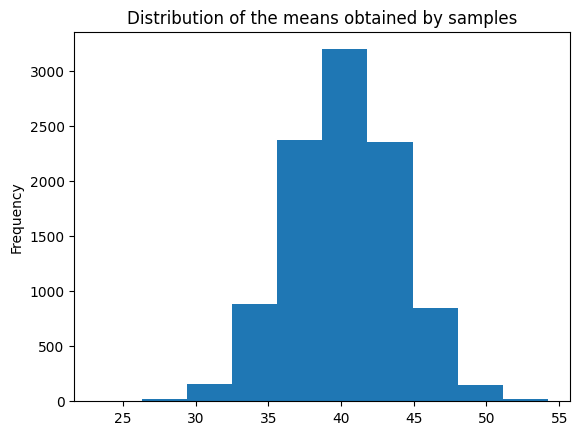

In [7]:
simulations = simulationSamples(population,amount_of_samples=10000,sample_size= 30)
print("Simulations:")
print(f'Mean: {simulations.mean()}')
print(f'Std:{simulations.std()}')

_= plt.figure()
_=pd.Series(simulations).plot.hist(title='Distribution of the means obtained by samples')
_=plt.show()